# HW 1.
Update your knowledge about linear basics with PyTorch

## Task 1.1

1. Review your understanding of Tensor:
[TensorFlow Guide on Tensors](https://www.tensorflow.org/guide/tensor), 
[PyTorch Tensor](https://pytorch.org/docs/stable/tensors.html)
2. Write implementation of the **matrix_vector_multiply**. Test **TestMatrixVectorMultiplication** should be passed

In [2]:
import torch
import unittest


# Define a 3x3 matrix
matrix_a = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype=torch.float32)

# Define a 3x1 vector
vector_v = torch.tensor([
    [1],
    [2],
    [3]
], dtype=torch.float32)

In [3]:
def matrix_vector_multiply(m: torch.tensor, v: torch.tensor):
    return m @ v

In [4]:
expected_result = torch.tensor([
            [14],
            [32],
            [50]
        ], dtype=torch.float32)

class TestMatrixVectorMultiplication(unittest.TestCase):
    def test_matrix_vector_multiply(self):
        result = matrix_vector_multiply(matrix_a, vector_v)
        print(result)
        self.assertTrue(torch.equal(result, expected_result))

if __name__ == "__main__":
    # TODO uncomment the test. All test should be passed
    unittest.main(argv=[''], verbosity=2, exit=False)
    pass

test_matrix_vector_multiply (__main__.TestMatrixVectorMultiplication.test_matrix_vector_multiply) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.072s

OK


tensor([[14.],
        [32.],
        [50.]])


## Task 1.2

1. Read .txt files from ./data/image_matrices/. Files contains 2D matrices with image information.
2. Use 'torch' for the processing 'np' arrays as a tensor.
3. Show image in the jupiter notebook based on prepared tensor

4. Explain why PyTorch by default has 4 channels for RGB (channel 1 = R, channel 2 = G, channel 3 = B) images instead of 3 channels: 

//TODO write your answer here 

Because the 4th channel gives you the alpha value that responds for image transparency.


Channel 0 shape =  (512, 868)
Channel 1 shape =  (512, 868)
Channel 2 shape =  (512, 868)
Channel 3 shape =  (512, 868)


C:\Users\Sanya\AppData\Local\Temp\ipykernel_23684\54024302.py:21: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:264.)
  stacked_tensor = torch.Tensor(secret_img_channels).permute(1,2,0)


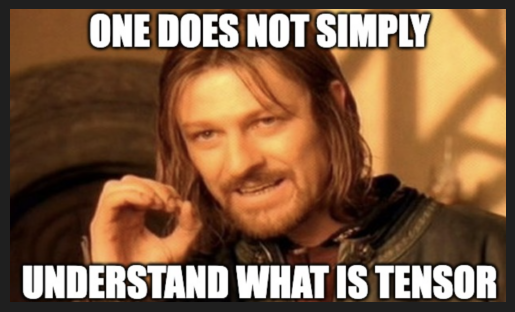

In [5]:
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

secret_img_channels = []
for i in range(4):
    secret_img_channels.append(np.loadtxt(f'./data/img_matrices/matrix_2D_channel_{i}.txt', delimiter=','))

for i in range(4):
    print(f"Channel {i} shape = ", secret_img_channels[i].shape)    


#TODO use 'torch' for the processing 'np' arrays as a tensor. Please see:
# https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html
# https://www.geeksforgeeks.org/python-pytorch-stack-method/
# https://pytorch.org/docs/stable/generated/torch.stack.html

# TODO 
stacked_tensor = torch.Tensor(secret_img_channels).permute(1,2,0)

# Visualize the tensor
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('#1f1f1f')
plt.imshow(stacked_tensor)
plt.axis(False)
plt.show()


In [12]:
def plot_channel(channel, color_index, axis, small_tensor):
        """
        Plot a specific RGB channel in 3D space using a scatter plot.

        Parameters:
            channel (torch.Tensor): Input channel tensor.
            color_index (int): Index representing the color channel (0 for Red, 1 for Green, 2 for Blue).
            axis (matplotlib.axes._subplots.Axes3D): 3D plot axis.
            small_tensor (torch.Tensor): Downsampled input tensor for visualization.

        Returns:
            None
        """
        color_map = {0: 'Blues_r', 1: 'Greens_r', 2: 'Reds_r'}
        z, y, x = channel.nonzero(as_tuple=True)
        values = small_tensor[z, y, x].numpy()
        axis.scatter(z.numpy(), y.numpy(), x.numpy() + color_index, c=values, cmap=color_map[color_index], s=5)

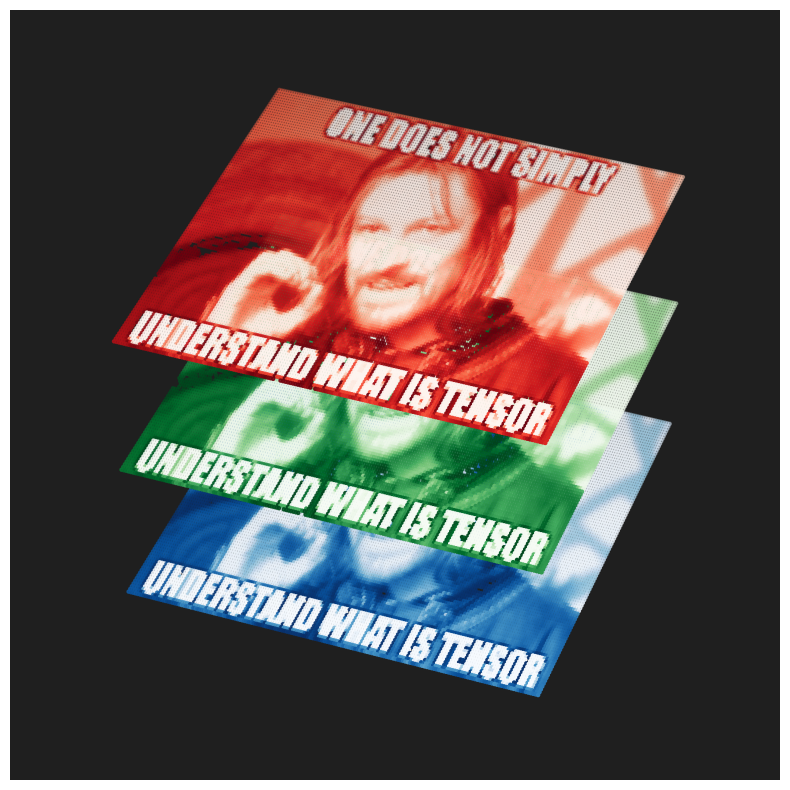

In [13]:
import torch
import matplotlib.pyplot as plt

def visualize_3d_channels(stacked_tensor, stride=5):
    """
    Visualize RGB channels of a stacked tensor in 3D space using a scatter plot.

    Parameters:
        stacked_tensor (torch.Tensor): Input stacked tensor with RGB channels.
        stride (int): Downsampling factor for visualization.

    Returns:
        None
    """
    # Down-sample the tensor for visualization
    tensor_small = stacked_tensor[::stride, ::stride, :-1]

    # Split the tensor into RGB channels
    r_channel, g_channel, b_channel = tensor_small.chunk(3, dim=2)

    fig = plt.figure(figsize=(10, 10))
    plot_axis = fig.add_subplot(111, projection='3d')

    for color_index, channel in enumerate([r_channel, g_channel, b_channel]):
        plot_channel(channel=channel, color_index=color_index, axis=plot_axis, small_tensor=tensor_small)

    plot_axis.set_facecolor('#1f1f1f')
    plot_axis.set_axis_off()
    plot_axis.view_init(elev=40, azim=20)
    plt.show()

visualize_3d_channels(stacked_tensor=stacked_tensor)
